
## 03. 평균 이동 (Mean Shift)
- 평균 이동은 중심을 데이터가 모여 있는 <U>밀도가 가장 높은 곳</U>으로 이동  
cf. K-평균은 데이터의 평균 거리 중심으로 이동
- 확률 밀도 함수를 이용하여 피크인 점을 군집 중심점으로 선정
- 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)을 이용
- 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식
<img src='https://user-images.githubusercontent.com/38090151/130345779-a3e1de38-376e-4493-8e45-48e58b6ad3ee.png'>

### KDE(Kernel Density Estimation, 커널밀도추정) [링크](https://darkpgmr.tistory.com/147)
1. __밀도 추정__ : 관측된 데이터(표본)의 분포를 통해 원래 변수(모집단)의 확률 분포를 추정하는 것
- 기계학습, 확률, 통계에서의 밀도 = 확률 밀도(probability density)
- 어떤 변수의 밀도(density)를 추정하는 것은 x의 확률 밀도 함수(probability density function, pdf)를 추정하는 것과 동일
- $f(a)$는 x=a에서의 확률 밀도 = "변수 x가 a 라는 값을 가진 상대적인 확률"

<img src='https://t1.daumcdn.net/cfile/tistory/2246C04B54EFD71E39' width='50%'>

2. __밀도(density) vs 확률(probability)__
- 지점 x=a일 확률 → 밀도
- 구간 x $\in$ [a,b]일 확률 → 확률, $P(a\leq x \leq b) = \int_{a}^{b}f(x)dx$

3. __parametic vs non-parametric__
- parametic : 확률 밀도 함수의 모델을 정해놓고, 데이터들로부터 함수의 파라미터를 추정  
예. 일일 교통량에 대한 확률 밀도 함수를 정규 분포로 가정하고, 데이터들로부터 평균과 분산을 계산
- non-parametic : 위의 가정 없이, 데이터로부터 분포를 추정  
예. 히스토그램, 커널밀도추정

4. __커널밀도추정__
- 다양한 커널함수(Kernel Function) : 원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수  
예. <U>가우시언(Gaussian)</U>, Epanechnikov, uniform 함수
$$\int_{-\infty}^{\infty} K(x)dx = 1$$
$$ K(-u) = K(u), K(u) \geq 0\ for\ \forall u$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Kernels.svg/1000px-Kernels.svg.png"  title="다양한 커널함수(출처:위키피디아)" width='50%'>

- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정하는 방법
$$KDE = \frac{1}{n} \Sigma_{i=1}^{n} K_{h}(x-x_{i}) = \frac{1}{nh} \Sigma_{i=1}^{n}K(\frac{x-x_{i}}{h})$$

<img src='https://user-images.githubusercontent.com/38090151/130346546-5a9c45e2-606d-4a33-b653-1f45db91a6ae.png'>

- 대역폭(bandwidth) h   
    - 작은 h 값은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합되기 쉽다.  
    - 반면에, 큰 h는 과도하게 평활화(smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하여 결과적으로 과소적합이 되기 쉽다. 
    - 따라서 적절한 KDE의 대역폭 h를 계산하는 것이 KDE 기반의 평균 이동 군집화에서 매우 중요
    - 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지고, 대역폭이 작을수록 많은 수의 군집 중심점을 가짐
    - 가우시안 커널함수를 사용할 경우 최적의 bandwidth 파라미터 값
    $$h = (\frac{4 \sigma^{5}}{3n})^{\frac{1}{5}} \approx 1.06 \sigma n^{\frac{-1}{5}} $$
    $$n : 샘플의 개수,\ \sigma = 샘플의 표준편차$$
    

5. __MeanShift 클래스__  
- 대역폭 h의 크기에 따라 군집화 수행 (군집 개수 지정 X) → 중요한 파라미터 h
- 대역폭 계산을 위한 __estimate_bandwith()__ 함수 제공


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 예제
make_blobs()의 cluster_std = 0.7로 정한 3개의 군집 데이터에 대해 bandwith=0.8로 설정한 MeanShift 군집화 알고리즘 적용

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

# h = 0.8
meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5]), array([57, 60, 51, 15, 10,  7]))


In [4]:
# h = 1
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels, return_counts=True))

(array([0, 1, 2]), array([67, 67, 66]))


### estimate_bandwidth()
- 최적의 대역폭 계산해주는 함수

In [5]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print(bandwidth)

1.8158484154517098


[0 1 2]


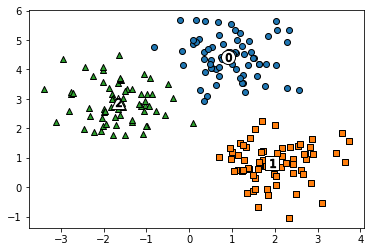

In [7]:
from sklearn.datasets import load_iris

# df
iris = load_iris()
cluster_df = pd.DataFrame(X, columns = ['ftr1','ftr2'])
cluster_df['target'] = y

# best_bandwidth
best_bandwidth = estimate_bandwidth(X)

# meanshift
meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_

# plot
markers = ['o','s','^']
plt.figure()
for i, mark in enumerate(markers) :
    x = cluster_df[cluster_df['meanshift_label']==i]['ftr1']
    y = cluster_df[cluster_df['meanshift_label']==i]['ftr2']
    
    plt.scatter(x,y, marker=mark, edgecolor='k')
    plt.scatter(centers[i,0], centers[i,1], marker=mark, s=200, color='white', edgecolor='k')
    plt.scatter(centers[i,0], centers[i,1], marker='$%d$'%i, s=70, color='k')

In [8]:
cluster_df.groupby(['target','meanshift_label'])['ftr1'].count()
# cluster_df[cluster_df['target'] != cluster_df['meanshift_label']]

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: ftr1, dtype: int64

#### 평균 이동의 장점
- 유연한 군집화 가능 (데이터 세트의 형태를 특정 형태로 가정X, 특정 분포도 기반의 모델로 가정X)
- 이상치 영향 ↓
- 군집화 개수 지정할 필요 X

#### 평균 이동의 단점
- 알고리즘 수행 시간 ↑
- bandwith의 크기에 따른 군집도 영향도가 매우 크다

#### 참조
- Kernel Density Estimation(커널밀도추정)에 대한 이해 [링크](https://darkpgmr.tistory.com/147)

#### 이미지 
- Kernel(statistic) [link](https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use)